In [35]:
!pip install nltk
!pip install WordCloud
!pip install stylecloud

     -------------------------------------- 262.1/262.1 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 161.4/161.4 kB 10.1 MB/s eta 0:00:00
     -------------------------------------- 111.8/111.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259493 sha256=e5e9fdd85577cfa30b0d7e73d1a0a639fb693633cdab38426d1a7936024a0831
  Stored in directory: c:\users\sontaesan\appdata\local\pip\cache\wheels\c5\8e\e8\d4fa02f02bc4eea452ff7722f5166d84b41d0c465beeed67cf
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=7c7a834a2b6078774935c969655b5ca5051855a2d42124c7b17bba378aff5139
  Stored in directory: c:\users\s

In [19]:
# basic Library
import sys
import re
import pickle
from collections import Counter

# basic ML library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nltk library
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [20]:
# nltk download
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sontaesan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sontaesan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sontaesan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# data read
pik = pd.read_csv("piks_pik.csv")
cat = pd.read_csv("piks_category.csv")
link = pd.read_csv("linkhub_link.csv")

C:\Users\Sontaesan\AppData\Local\Temp\ipykernel_25064\412633483.py:4: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  link = pd.read_csv("linkhub_link.csv")


In [22]:
## pikurate bot id Load pickle
with open("artificial_user_list","rb") as fr:
    pik_bot_id = pickle.load(fr)
print(pik_bot_id)

[1576, 4558, 1337, 3448, 3464, 3466, 4864, 4913, 4761, 4918, 4817, 4763, 4856, 4846, 4854, 5213, 4979, 4760, 6359, 6324, 6356, 6384, 6230, 6276, 6257, 6232, 6223, 6221, 6299, 6233, 6224, 6291, 6235, 6255, 6269, 6238, 6220, 6259, 6314, 6250, 6287, 6239, 6244, 6241, 6289, 6242, 6260, 6275]


In [23]:
# pikurate bot del
new_link = link[~link['user_id'].isin(pik_bot_id)]
print(f"피큐봇 제거 전 데이터 개수 : {link.shape[0]}개")
print(f"피큐봇 제거 후 데이터 개수 : {new_link.shape[0]}개")

피큐봇 제거 전 데이터 개수 : 620018개
피큐봇 제거 후 데이터 개수 : 178484개


In [24]:
# stop_words
set_words = {"google", "com", "https", "http", "docx", "youtube", "www", "pdf", "blog", "wikipedia"}
stop_words = set(stopwords.words('english')) 
for new_word in set_words:
    stop_words.add(new_word)

In [25]:
# regular expression
def en_preprocess(document : str) -> str:
    # en word sub
    pattern = r'[^A-Za-z]' 
    document = re.sub(pattern, ' ', document)
    # remove empty space
    document = document.strip()
    # make empty spcae size as only one
    document = ' '.join(document.split())
    return document.lower()

In [26]:
# nltk pos Extraction
def nltk_token_pos (text):
    # nltk word_tokenize
    token = word_tokenize(text)
    token_pos = pos_tag(token)
    new_pos = []
    # nouns word classify
    for word, pos in token_pos:
        if pos == "NN":
            # stopwords 
            if word in stop_words: 
                continue
            # length 2 or more word
            elif len(word) >= 2:
                new_pos.append(word)
    return new_pos

In [27]:
# word Counter
def word_top_counter (text, ntags=500):
    count = Counter(text)
    return { n : c  for n, c in count.most_common(ntags)}

In [28]:
# top frequency graph
def frequency_graph (top_word):
    plt.figure(figsize=(15,10))
    sorted_keys = sorted(top_word, key=top_word.get, reverse=True)
    sorted_values = sorted(top_word.values(), reverse=True)
    plt.bar(range(len(top_word)), sorted_values, align="center", linewidth=0.8)
    plt.xticks(range(len(top_word)), list(sorted_keys), rotation="75")
    plt.xlabel("키워드")
    plt.ylabel("빈도수")
    plt.grid(True)
    plt.show()

In [29]:
# en nlp prepreocess
link_title = new_link.loc[:, "title"]
en_word = [en_preprocess(str(n)) for n in link_title]
only_en_word = [en for en in en_word if len(en) > 2]
only_en_word[:5]

['aws amplify react app',
 'dotenv delft stack',
 'tip',
 'github dalance procs a modern replacement for ps written in rust',
 'basic use cases jarun nnn wiki']

In [30]:
# nltk token class
en_ex_word = []
for en in en_word:
    en_ex_word.extend(nltk_token_pos(en))

In [31]:
# 500개 counter
top_cnt = word_top_counter(en_ex_word)

In [32]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

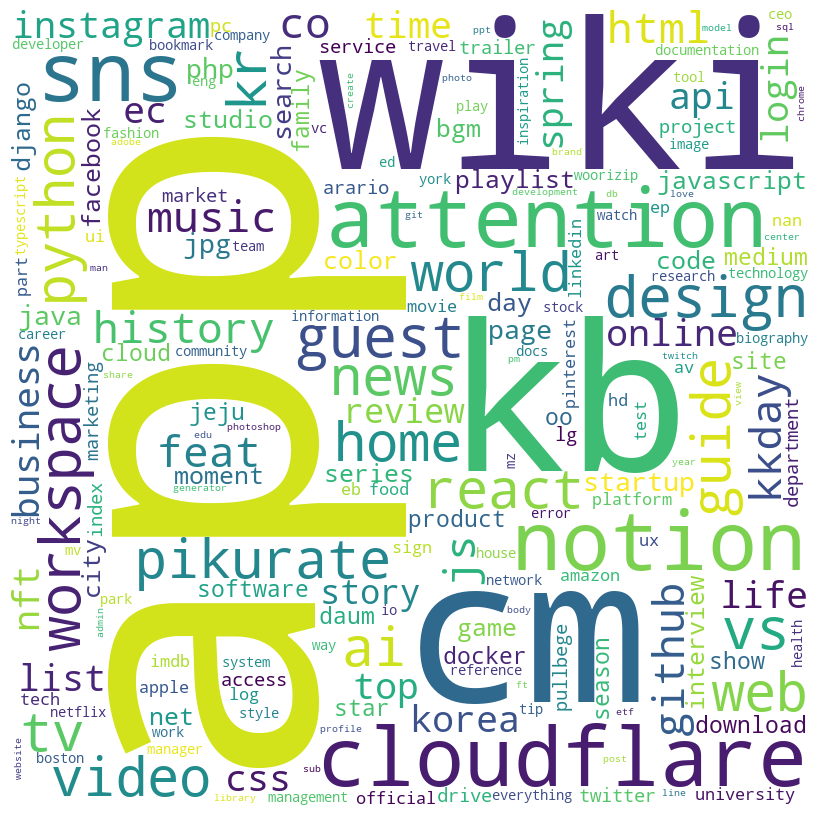

In [33]:
# 필요한 라이브러리 import
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# font_path = 'c:\Windows\Fonts\Maplestory light.ttf'
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(top_cnt))

# 그래프 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()


In [36]:
import stylecloud

# 입력 텍스트
text = "Hello World"

# 스타일 설정
stylecloud.gen_stylecloud(top_cnt, icon_name='fas fa-space-shuttle', 
                          palette='colorbrewer.diverging.Spectral_11', 
                          background_color='black', 
                          gradient='horizontal')

# 클라우드 그림 생성
stylecloud.gen_stylecloud(top_cnt, icon_name='fas fa-space-shuttle', 
                          palette='colorbrewer.diverging.Spectral_11', 
                          background_color='black', 
                          gradient='horizontal', output_name='hello_world.png')

